<a href="https://colab.research.google.com/github/mqduan/Machine-Learning-implementation/blob/main/Optimization_algorithms_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Optimization Algorithms on MNIST##
In this notebook, I will try to implement a simple 2 layer Neural Network on the MNIST dataset. And compare the optimization process of Stochastic Gradient Descent and other variants of adaptive gradient based methods, namely, AdaGrad, RMSprop and Adam.

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision


In [2]:
batch_size=64
batch_size_test=1000
random_seed=100
torch.backends.cudnn.enabled=True
torch.manual_seed(random_seed)

In [3]:
## load MNIST data
train_loader=torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(root='./',download=True,train=True,
                               transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                                                         torchvision.transforms.Normalize(
                                                                             (0.1307,),(0.3081,))
                                                                         ])),
                               batch_size=batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(root='./',download=True, train=False,
                               transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                                                         torchvision.transforms.Normalize(
                                                                             (0.1307,),(0.3081,)
                                                                         )])),
                               batch_size=batch_size_test,shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



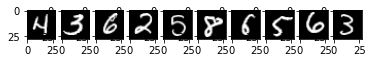

In [4]:
## display some sample images
sample=next(iter(train_loader))
fig,axs=plt.subplots(1,10)
for i in range(10):
  axs[i].imshow(sample[0][i].squeeze(0), cmap='gray')



# Using Gradient Descent

In [5]:
## implement a simple 2 layer Neural Network
N, D_in, H1,H2,D_out = 64, 784, 256, 128, 10
model_gd = nn.Sequential(
    nn.Linear(D_in, H1),
    nn.ReLU(),
    nn.Linear(H1, H2),
    nn.ReLU(),
    nn.Linear(H2, D_out)
)
loss_fn=nn.CrossEntropyLoss()

[1, 200]: 2.2589
[1, 400]: 2.1932
[1, 600]: 2.1141
[1, 800]: 2.0113
[2, 200]: 1.7664
[2, 400]: 1.598
[2, 600]: 1.4151
[2, 800]: 1.2504
[3, 200]: 1.0061
[3, 400]: 0.9089
[3, 600]: 0.8272
[3, 800]: 0.7636
[4, 200]: 0.6685
[4, 400]: 0.6334
[4, 600]: 0.605
[4, 800]: 0.577
[5, 200]: 0.5432
[5, 400]: 0.5153
[5, 600]: 0.5111
[5, 800]: 0.4862
[6, 200]: 0.469
[6, 400]: 0.4591
[6, 600]: 0.4531
[6, 800]: 0.4334
[7, 200]: 0.4318
[7, 400]: 0.4211
[7, 600]: 0.4079
[7, 800]: 0.4066
[8, 200]: 0.3913
[8, 400]: 0.3932
[8, 600]: 0.3761
[8, 800]: 0.3902
[9, 200]: 0.3751
[9, 400]: 0.3699
[9, 600]: 0.373
[9, 800]: 0.3578
[10, 200]: 0.3494
[10, 400]: 0.3488
[10, 600]: 0.3573
[10, 800]: 0.3537
[11, 200]: 0.3496
[11, 400]: 0.3327
[11, 600]: 0.334
[11, 800]: 0.341
[12, 200]: 0.3293
[12, 400]: 0.3355
[12, 600]: 0.3388
[12, 800]: 0.3213
[13, 200]: 0.3233
[13, 400]: 0.3156
[13, 600]: 0.3185
[13, 800]: 0.3145
[14, 200]: 0.3147
[14, 400]: 0.3039
[14, 600]: 0.3086
[14, 800]: 0.3233
[15, 200]: 0.3117
[15, 400]: 0.3069

Text(0.5, 1.0, 'Loss using Gradient Descent')

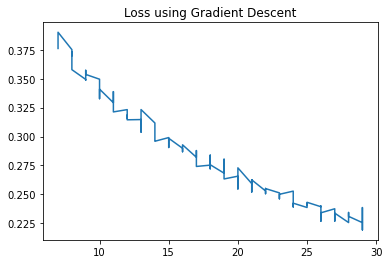

In [6]:

Epochs=30
learning_rate=1e-3
losses=[]
epo=[]

for epoch in range(Epochs):
  running_loss=0
  for i, data in enumerate(train_loader,0):
    inputs,label=data
    inputs=inputs.view(inputs.shape[0],-1)
    pred=model_gd(inputs)
    loss=loss_fn(pred, label)
    loss.backward()

    with torch.no_grad():
      for param in model_gd.parameters():
        param -= learning_rate * param.grad  ## use regular gradient descent
      model_gd.zero_grad()

    running_loss +=loss.item() 
    if i%200==199:
      print(f'[{epoch+1}, {i+1}]: {round(running_loss/200,4)}')       
      losses[epoch]=losses.append(running_loss/200)
      epo[epoch]=epo.append(epoch)
      running_loss=0
print('Training complete.')
plt.plot(epo,losses)
plt.title('Loss using Gradient Descent')



In [10]:
correct=0
total=0
model_gd.eval()
for data in test_loader:
  inputs,label=data
  inputs=inputs.view(inputs.shape[0],-1)
  pred=model_gd(inputs)
  _,predicted=torch.max(pred.data,1)
  total +=label.size(0)
  correct += (predicted==label).sum().item()
print(f'Using gradient descent, the accuracy on 10000 test images is {correct/total:.2f}.')


Using gradient descent, the accuracy on 10000 test images is 0.94.


# Implement Adagrad

In [7]:
N,D_in,H1,H2,D_out=64,784,256,128,10
w1=torch.normal(0,0.01,size=(D_in,H1),requires_grad=True)
w2=torch.normal(0,0.01,size=(H1,H2),requires_grad=True)
w3=torch.normal(0,0.01,size=(H2,D_out),requires_grad=True)
sigma1=torch.zeros(w1.size())
sigma2=torch.zeros(w2.size())
sigma3=torch.zeros(w3.size())

[1,200]: 1.0878683936595916
[1,400]: 0.6024375446140766
[1,600]: 0.50544577896595
[1,800]: 0.4661992619931698
[2,200]: 0.41376712046563624
[2,400]: 0.382446603924036
[2,600]: 0.3807249486446381
[2,800]: 0.3774686653912067
[3,200]: 0.35481161646544934
[3,400]: 0.3564839753508568
[3,600]: 0.3426909624785185
[3,800]: 0.3374496601521969
[4,200]: 0.3409553215280175
[4,400]: 0.3217335380613804
[4,600]: 0.32093261145055296
[4,800]: 0.3249372625350952
[5,200]: 0.31205512408167124
[5,400]: 0.3185973373055458
[5,600]: 0.3216317080706358
[5,800]: 0.31825578354299067
[6,200]: 0.3036379998549819
[6,400]: 0.29771725084632633
[6,600]: 0.30449985660612583
[6,800]: 0.2993006620183587
[7,200]: 0.28522185448557136
[7,400]: 0.29460971675813197
[7,600]: 0.29481030244380235
[7,800]: 0.29883929155766964
[8,200]: 0.28344687275588515
[8,400]: 0.28320091668516395
[8,600]: 0.28480040486902
[8,800]: 0.292511710934341
[9,200]: 0.28333518028259275
[9,400]: 0.2712157420068979
[9,600]: 0.2852529165148735
[9,800]: 0.2

Text(0.5, 1.0, 'losses using Adagrad')

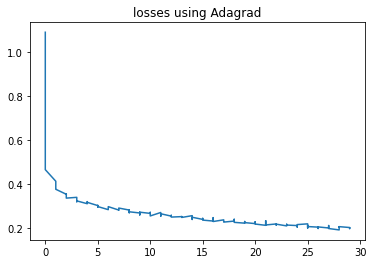

In [8]:
learning_rate=1e-3
eps=1e-8
Epochs=30
epo=[]
losses=[]

for epoch in range(Epochs):
  running_loss=0
  for i, data in enumerate(train_loader,0):
    inputs,label=data
    inputs=inputs.view(inputs.shape[0],-1)
    pred=inputs.mm(w1).clamp(min=0).mm(w2).clamp(min=0).mm(w3)
    loss=loss_fn(pred,label)
    loss.backward()

    with torch.no_grad():
      sigma1 +=torch.square(w1.grad)
      sigma2 += torch.square(w2.grad)
      sigma3 += torch.square(w3.grad)
      w1 -= learning_rate*w1.grad/torch.sqrt(sigma1+eps)
      w2 -= learning_rate*w2.grad/torch.sqrt(sigma2+eps)
      w3 -= learning_rate*w3.grad/torch.sqrt(sigma3+eps)
    w1.grad.data.zero_()
    w2.grad.data.zero_()
    w3.grad.data.zero_()

    running_loss +=loss.item()
    if i%200==199:
      print(f'[{epoch+1},{i+1}]: {running_loss/200}')
      losses.append(running_loss/200)
      epo.append(epoch)
      running_loss=0

print('Training complete.')
plt.plot(epo,losses)
plt.title('losses using Adagrad')

In [9]:
correct=0
total=0
with torch.no_grad():
  for data in test_loader:
    images,labels=data
    images=images.view(images.shape[0],-1)
    outputs=images.mm(w1).clamp(min=0).mm(w2).clamp(min=0).mm(w3)
    _,predicted=torch.max(outputs.data,1)
    total += labels.size(0)
    correct +=(predicted==labels).sum().item()
print ('With Adagrad, accuracy of the network on the 10000 test images: %d %%' %(100*correct/total))

With Adagrad, accuracy of the network on the 10000 test images: 94 %


# Implement Adam

In [11]:
w1=torch.normal(0,0.01,size=(D_in, H1),requires_grad=True)
w2=torch.normal(0,0.01,size=(H1,H2),requires_grad=True)
w3=torch.normal(0,0.01,size=(H2,D_out),requires_grad=True)
G1=torch.zeros(w1.size())
G2=torch.zeros(w2.size())
G3=torch.zeros(w3.size())
m1=torch.zeros(w1.size())
m2=torch.zeros(w2.size())
m3=torch.zeros(w3.size())


[1,  200] loss: 0.629
[1,  400] loss: 0.282
[1,  600] loss: 0.212
[1,  800] loss: 0.171
[2,  200] loss: 0.116
[2,  400] loss: 0.107
[2,  600] loss: 0.106
[2,  800] loss: 0.109
[3,  200] loss: 0.072
[3,  400] loss: 0.077
[3,  600] loss: 0.077
[3,  800] loss: 0.069
[4,  200] loss: 0.053
[4,  400] loss: 0.058
[4,  600] loss: 0.056
[4,  800] loss: 0.058
[5,  200] loss: 0.039
[5,  400] loss: 0.041
[5,  600] loss: 0.038
[5,  800] loss: 0.052
[6,  200] loss: 0.030
[6,  400] loss: 0.037
[6,  600] loss: 0.038
[6,  800] loss: 0.035
[7,  200] loss: 0.024
[7,  400] loss: 0.029
[7,  600] loss: 0.030
[7,  800] loss: 0.030
[8,  200] loss: 0.020
[8,  400] loss: 0.023
[8,  600] loss: 0.024
[8,  800] loss: 0.027
[9,  200] loss: 0.021
[9,  400] loss: 0.019
[9,  600] loss: 0.024
[9,  800] loss: 0.023
[10,  200] loss: 0.013
[10,  400] loss: 0.021
[10,  600] loss: 0.023
[10,  800] loss: 0.020
[11,  200] loss: 0.017
[11,  400] loss: 0.017
[11,  600] loss: 0.019
[11,  800] loss: 0.024
[12,  200] loss: 0.012
[

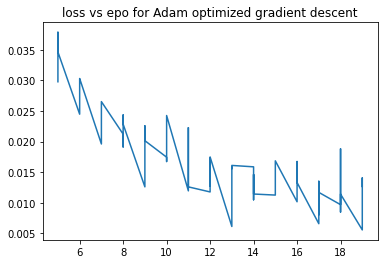

In [12]:
learning_rate=1e-3
eps=1e-8
beta1=0.9
beta2=0.99
t=1
obj=[]
epo=[]

for epoch in range(20):
  running_loss=0
  for i, data in enumerate(train_loader,0):
    inputs,labels=data
    inputs=inputs.view(inputs.shape[0],-1)

    y_pred=inputs.mm(w1).clamp(min=0).mm(w2).clamp(min=0).mm(w3)
    loss=loss_fn(y_pred,labels)# use cross entropy loss
    
    loss.backward()

    with torch.no_grad():
      m1[:]=beta1*m1+(1-beta1)*w1.grad
      G1[:]=beta2*G1+(1-beta2)*torch.square(w1.grad)
      m1_corr=m1/(1-beta1**t)
      G1_corr=G1/(1-beta2**t)
      m2[:]=beta1*m2+(1-beta1)*w2.grad
      G2[:]=beta2*G2+(1-beta2)*torch.square(w2.grad)
      m2_corr=m2/(1-beta1**t)
      G2_corr=G2/(1-beta2**t)
      m3[:]=beta1*m3+(1-beta1)*w3.grad
      G3[:]=beta2*G3+(1-beta2)*torch.square(w3.grad)
      m3_corr=m3/(1-beta1**t)
      G3_corr=G3/(1-beta2**t)
      w1-=learning_rate*m1_corr/(torch.sqrt(G1_corr)+eps)
      w2-=learning_rate*m2_corr/(torch.sqrt(G2_corr)+eps)
      w3-=learning_rate*m3_corr/(torch.sqrt(G3_corr)+eps)
      t=t+1
    w1.grad.data.zero_()
    w2.grad.data.zero_()
    w3.grad.data.zero_()


    running_loss+=loss.item()
    if i%200==199:
      print('[%d,%5d] loss: %.3f' %
              (epoch+1,i+1,running_loss/200))
      
      obj[epoch]=obj.append(running_loss/200)
      epo[epoch]=epo.append(epoch)
      running_loss=0
plt.plot(epo,obj)
plt.title('loss vs epo for Adam optimized gradient descent')
print('Finished Training')

In [13]:
correct=0
total=0
with torch.no_grad():
  for data in test_loader:
    images,labels=data
    images=images.view(images.shape[0],-1)
    outputs=images.mm(w1).clamp(min=0).mm(w2).clamp(min=0).mm(w3)
    _,predicted=torch.max(outputs.data,1)
    total += labels.size(0)
    correct +=(predicted==labels).sum().item()
print ('With Adam, accuracy of the network on the 10000 test images: %d %%' %(100*correct/total))

With Adam, accuracy of the network on the 10000 test images: 98 %


#Reference
1. ADAM: A METHOD FOR STOCHASTIC OPTIMIZATION by Diederik P. Kingma and Jimmy Lei Ba https://arxiv.org/pdf/1412.6980.pdf

